# Component 2 Question 1
#### First Edit: 03/29/2017
#### Latest Edit: 04/11/2017
----
In order to un this notebook, you need to install:
- cartopy
- ipywidgets
- plotly
- colorlover
- bokeh
----
## Read in the Grant data

In [209]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
from collections import Counter

In [210]:
data = pd.read_csv('./DiscGrants96to13.csv', encoding='latin')

In [211]:
data.head()

,LogNumber,Institution,Program,ProgramType,ProjectTitle,ProjectType,AwardDate,InstAddr1,InstAddr2,InstAddr3,...,Longitude,FIPSState,FIPSCounty,CensusTract,CensusBlock,FIPSMCDCode,FIPSPlaceCode,CBSACode,MetroDivisionCode,Description
0,IA-00-00-0001-00,Museum of the Aleutians,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 648,NaN,NaN,...,-166.536862,2.0,16.0,200.0,2014.0,1615.0,80770.0,NaN,NaN,NaN
1,IA-00-00-0002-00,"Depot Museum, Inc.",Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 681420,NaN,NaN,...,-85.694757,1.0,49.0,961000.0,2013.0,91206.0,27616.0,NaN,NaN,NaN
2,IA-00-00-0003-00,National Voting Rights Museum and Institute,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,6 Highway 80 East,NaN,NaN,...,-87.017024,1.0,47.0,957200.0,1005.0,92883.0,NaN,42820.0,NaN,NaN
3,IA-00-00-0004-00,Bob Jones Museum,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 613,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IA-00-00-0005-00,Coronado Museum of History and Art,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,1100 Orange Avenue,NaN,NaN,...,-117.170703,6.0,73.0,10900.0,1021.0,92780.0,16378.0,41740.0,NaN,NaN


In [212]:
data.keys()

Index(['LogNumber', 'Institution', 'Program', 'ProgramType', 'ProjectTitle',
       'ProjectType', 'AwardDate', 'InstAddr1', 'InstAddr2', 'InstAddr3',
       'InstCity', 'InstState', 'InstZip', 'AwardOrig', 'AwardTotal',
       'AppMatchAmount', 'ReqAwardAmount', 'ReqMatchAmount', 'Prefix',
       'FirstName', 'LastName', 'OrgType', 'FiscalYear', 'AwardPeriodFr',
       'AwardPeriodTo', 'OrgUnit', 'OUAddr1', 'OUAddr2', 'OUAddr3', 'OUCity',
       'OUState', 'OUZip', 'Latitude', 'Longitude', 'FIPSState', 'FIPSCounty',
       'CensusTract', 'CensusBlock', 'FIPSMCDCode', 'FIPSPlaceCode',
       'CBSACode', 'MetroDivisionCode', 'Description'],
      dtype='object')

In [213]:
data['ProgramType'].unique()

array(['IA', 'IC', 'IG', 'IL', 'IM', 'IS', 'LE', 'LG', 'LI', 'LT', 'MA',
       'MH', 'ML', 'MN', 'RE', 'ST', 'MP'], dtype=object)

In [214]:
data['FiscalYear'].value_counts()

1998.0    988
2001.0    956
1999.0    903
2000.0    894
2004.0    880
2003.0    879
2002.0    876
2005.0    874
1997.0    673
2010.0    661
2009.0    638
2011.0    628
1996.0    623
2012.0    619
2007.0    611
2006.0    580
2008.0    561
2013.0    372
Name: FiscalYear, dtype: int64

In [215]:
data.shape

(13218, 43)

## Read in GDP Data

In [224]:
# GDP by MA data
gdp = pd.read_csv('./GDP_by_MA.csv', encoding='latin')

# switch wide format to long format
gdp.drop('Area', axis = 1, inplace = True)
gdp.set_index('Fips', inplace=True)
gdp = gdp.stack(level=0).reset_index()
gdp.columns = ['CBSACode', 'FiscalYear','GDP']
gdp.CBSACode = gdp.CBSACode.astype(float)
gdp.FiscalYear = gdp.FiscalYear.astype(float)

print(gdp.tail())
print(gdp.shape)

      CBSACode  FiscalYear    GDP
5725   49740.0      2011.0  25661
5726   49740.0      2012.0  23884
5727   49740.0      2013.0  25148
5728   49740.0      2014.0  24149
5729   49740.0      2015.0  24384
(5730, 3)


In [225]:
left = pd.DataFrame({'k': [2000.0, 2001.0, 2002.0], 's': [112,112,112],'l': [1, 2, 3], 't':[1,3,4]})
right = pd.DataFrame({'k': [2000, 2000, 2000,2002,2002], 
                      's':[112.0,113.0,114.0,112.0,112.0],'v': ['TP','AK','DF','TT','SD']})
left = left.set_index(['k','s'])
print(left)
right = right.set_index(['k','s'])
print(right)
result = right.join(left)
result = result.reset_index()
print(result)

            l  t
k      s        
2000.0 112  1  1
2001.0 112  2  3
2002.0 112  3  4
             v
k    s        
2000 112.0  TP
     113.0  AK
     114.0  DF
2002 112.0  TT
     112.0  SD
      k      s   v    l    t
0  2000  112.0  TP  1.0  1.0
1  2000  113.0  AK  NaN  NaN
2  2000  114.0  DF  NaN  NaN
3  2002  112.0  TT  3.0  4.0
4  2002  112.0  SD  3.0  4.0


In [226]:
a = pd.DataFrame({'a': [1, 2, 3]}, index=[1, 2, 1])
print(a)
b = pd.DataFrame({'b': [2, 3, 4]}, index=[1, 5, 5])
print(b)
a.join(b)

   a
1  1
2  2
1  3
   b
1  2
5  3
5  4


,a,b
1,1,2.0
1,3,2.0
2,2,NaN


## Merge Grant Data (Selected Columns) and GDP Data by CBSA Code

In [230]:
left = data[['CBSACode','FiscalYear',
             'AwardTotal','Longitude','Latitude']].dropna(subset = ['CBSACode','FiscalYear']).set_index(['CBSACode','FiscalYear'])
right = gdp.set_index(['CBSACode','FiscalYear'])

data_merged = left.join(right)
data_merged = data_merged.reset_index()
print(data_merged.keys())

Index(['CBSACode', 'FiscalYear', 'AwardTotal', 'Longitude', 'Latitude', 'GDP'], dtype='object')


## Question 1: Exploring Program Type and Award Total

### The Distribtuion of Grant-receiving Institutes Around US (Using Cartopy)

#### !!! Need to install *cartopy* to run the following blocks !!!

In [231]:
import cartopy.crs as ccrs
import cartopy

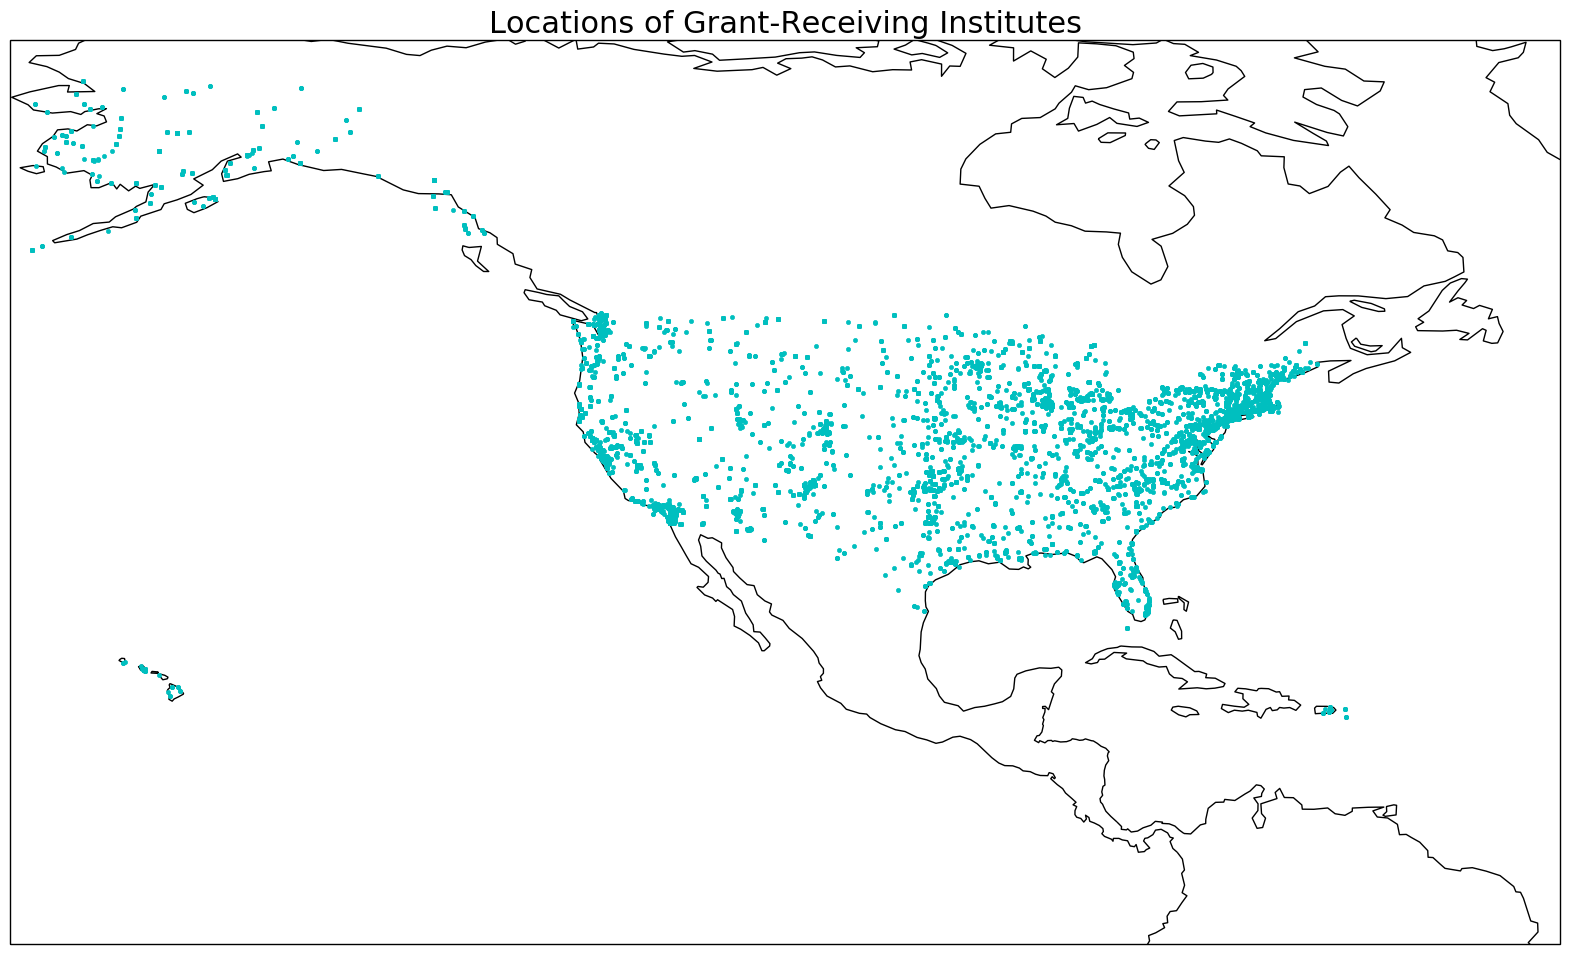

In [232]:
champaign = (40.1164, -88.2434)
fig, ax = plt.subplots(figsize = (20,20))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.coastlines()
#ax.stock_img()
ax.set_extent([champaign[1] - 80, champaign[1] + 40, champaign[0] - 40, champaign[0] + 30], ccrs.PlateCarree())
ax.plot(data["Longitude"],data["Latitude"], '.c')
ax.set_title('Locations of Grant-Receiving Institutes', fontsize = 22)
#ax.gridlines()

### The Distributions of Differenty Types of Grants (Using ipywidets)

#### !!! Need to install *ipywidgets* to run the following blocks !!!

In [233]:
plt.rcParams["figure.figsize"] = (15, 15)
def grant_type(column, value):
    good = (data[column] == value)
    data_filtered = data[good]
    champaign = (40.1164, -88.2434)
    fig, ax = plt.subplots(figsize = (20,20))
    ax = plt.axes(projection = ccrs.PlateCarree())
    ax.coastlines()
    ax.set_extent([champaign[1] - 80, champaign[1] + 40, champaign[0] - 40, champaign[0] + 30], ccrs.PlateCarree())
    ax.plot(data_filtered["Longitude"],data_filtered["Latitude"], '.c')
    ax.set_title('Prgrom Type: {0}'.format(value), fontsize = 22)

<function __main__.grant_type>

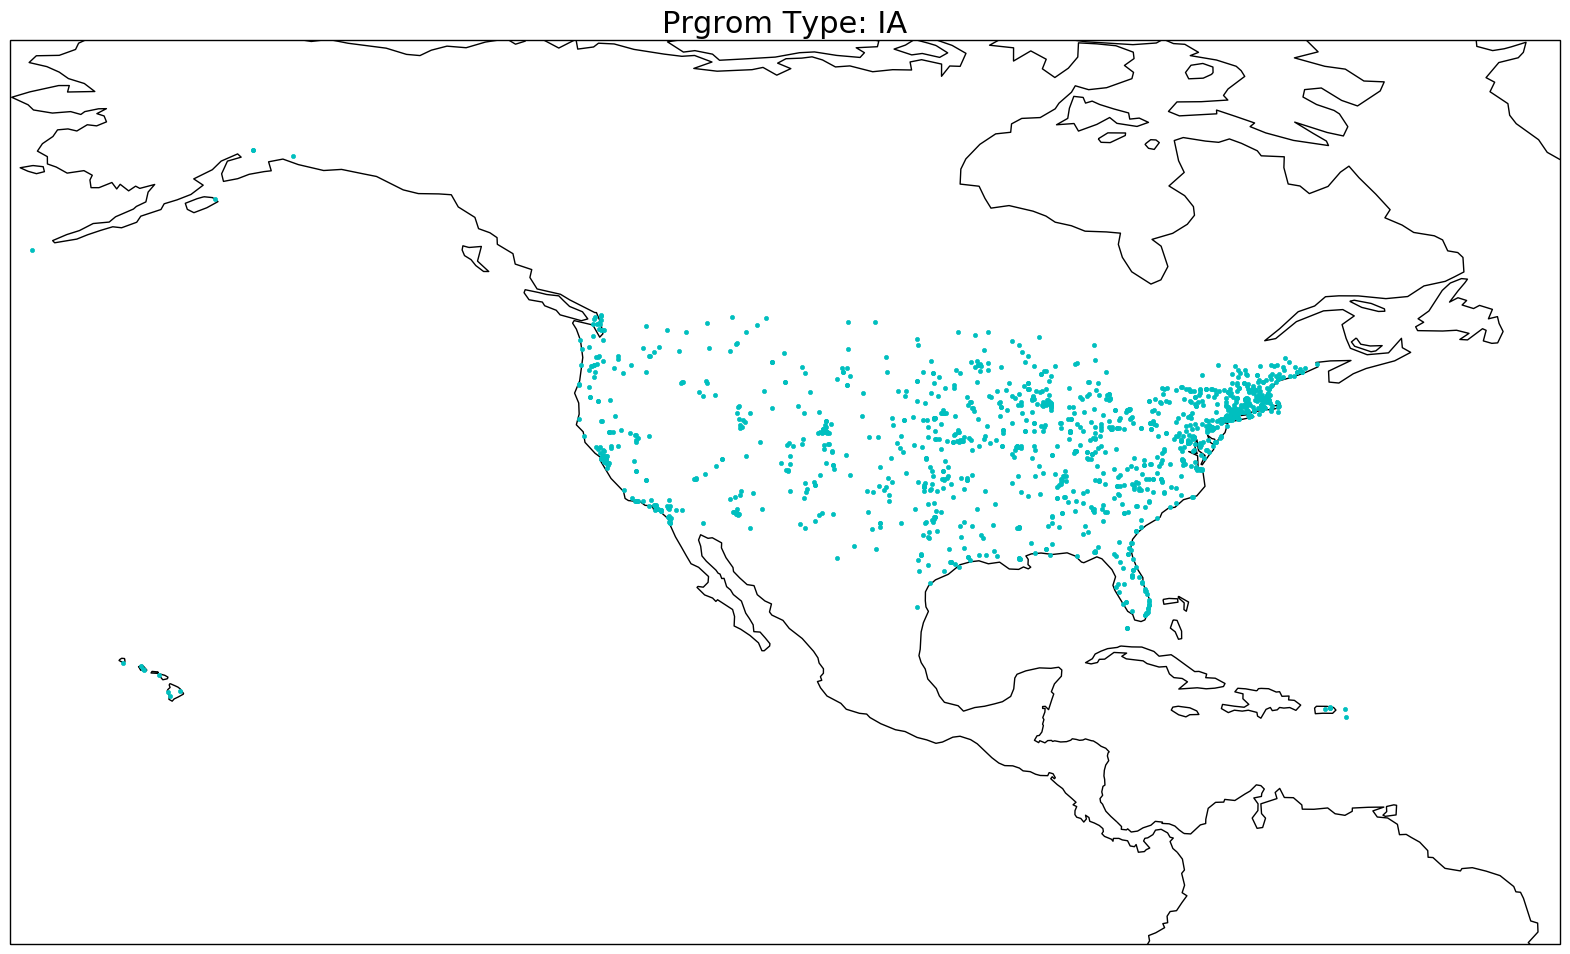

In [234]:
import ipywidgets
ipywidgets.interact(grant_type, column = 'ProgramType',
                   value = data['ProgramType'].unique().tolist())

### Trend in the Change of Grant Composition (Using Plotly)

#### !!! Need to install *plotly*  and *colorlover* to run the following blocks !!!

In [235]:
def data_filter(column,value):
    selected = data[column] == value
    data_filtered = data[selected]
    return data_filtered

In [236]:
import plotly
import plotly.plotly as py
import colorlover as cl
from plotly.graph_objs import *

plotly.tools.set_credentials_file(username='lzeng6', api_key='sET35IN6zBEbv5lZaT9M')

In [237]:
import plotly.graph_objs as go

trace = []

types = data['ProgramType'].unique().tolist()

colors = cl.scales['8']['qual']['Set2']
colors = cl.interp(colors, len(types))

for idx, pg_type in enumerate(types):
    
    dt = data_filter('ProgramType',pg_type)
    x = sorted(dt['FiscalYear'].unique().tolist())
    y = dt['FiscalYear'].value_counts().sort_index().tolist()
    trace.append(go.Scatter(
        x = x,
        y = y,
        name = pg_type,
        mode = 'lines',
        line = dict(width=1,
              color=colors[idx])
    ))

layout = go.Layout(
    showlegend=True,
    title = 'Counts of Grants by Program Type (1996-2013)',
    #updatemenu = list([
    #        dict = (
    #        ),
    #    ]
    #),
    xaxis=dict(
        title = 'Years',
        type = 'linear',
        range = [1996,2013],
        dtick = 1,
    ),
    yaxis=dict(
        title = 'Counts'
    )
)

fig = go.Figure(data = trace, layout = layout)
py.iplot(fig, filename='stream_program_type')

### Locations of Institutes and Grant Award Total (Using Bokeh)

#### !!! Need to install *bokeh* to run the following blocks !!!

In [238]:
from bokeh.io import output_notebook, show, gridplot
from bokeh.plotting import figure
import bokeh.models
from bokeh.models import PrintfTickFormatter

In [239]:
output_notebook()

Loading BokehJS ...

In [240]:
dt = data.copy()[['FiscalYear','AwardTotal','Longitude','Latitude']]
source = bokeh.models.ColumnDataSource(dt)

In [241]:
TOOLS = 'box_select,lasso_select,help,reset,box_zoom'

p1 = figure(tools = TOOLS, 
                title = "Grant Award Total by Fiscal Year",
                width=600, height = 600, 
                x_range = (1995,2014), y_range = (0, 1000000),
                x_axis_label = 'Fiscal Year', y_axis_label = 'Award Total')

p1.yaxis[0].formatter = PrintfTickFormatter(format="%6.0f")
                
p2 = figure(tools = TOOLS, 
                title = "Locations of Institutes",
                width=600, height = 600,
                x_axis_label = 'Longitude', y_axis_label = "Latitude")

p2.xaxis[0].formatter = PrintfTickFormatter(format="%5.2f")
p2.yaxis[0].formatter = PrintfTickFormatter(format="%5.2f")

In [242]:
p1.circle('FiscalYear','AwardTotal', source = source,
                 size = 2,
                 selection_color="firebrick",
                 nonselection_fill_alpha=0.05,
                 nonselection_fill_color="blue")
p2.circle('Longitude','Latitude', source = source,
                 size = 2,
                 selection_color="firebrick",
                 nonselection_fill_alpha=0.05,
                 nonselection_fill_color="blue")

In [243]:
p = gridplot([[p1, p2]])
show(p)

### Grant Award Total and Local GDP (Using Bokeh)

In [244]:
dt2 = data_merged.copy()
source = bokeh.models.ColumnDataSource(dt2)

In [248]:
TOOLS = 'box_select,lasso_select,help,reset,box_zoom'

p1 = figure(tools = TOOLS, 
                title = "Grant Award Total by Fiscal Year",
                width=600, height = 600, 
                x_range = (1995,2014), y_range = (0, 1000000),
                x_axis_label = 'Fiscal Year', y_axis_label = 'Award Total')

p1.yaxis[0].formatter = PrintfTickFormatter(format="%6.0f")
                
p2 = figure(tools = TOOLS, 
                title = "GDP by Fiscal Year",
                width=600, height = 600,
                x_axis_label = 'FiscalYear', y_axis_label = "Local GDP")

p2.yaxis[0].formatter = PrintfTickFormatter(format="%6.0f")

In [249]:
p1.circle('FiscalYear','AwardTotal', source = source,
                 size = 2,
                 selection_color="firebrick",
                 nonselection_fill_alpha=0.05,
                 nonselection_fill_color="blue")
p2.circle('FiscalYear','GDP', source = source,
                 size = 2,
                 selection_color="firebrick",
                 nonselection_fill_alpha=0.05,
                 nonselection_fill_color="blue")

In [250]:
p = gridplot([[p1, p2]])
show(p)